In [1]:
import numpy as np
import matplotlib.pyplot as plt
import histlite

import sys
sys.path.append('/Users/yumiao/Documents/Works/0nbb/nEXO/Physics/sterile_nu/sensitivity/')

from detector import detector
from neutrino_source import neutrino_source
from oscillation import *
from signal_spectrum import signal_calculation

In [5]:
source = neutrino_source('Cr51', 1e5, [0.43, 0.75], [0.1, 0.9])
det = detector('nEXO')

L = 0.92 # unit: m
det.baseline = L

Emin, Emax, Estep = 0.3, 1.0, 0.01 # unit: MeV
bins = np.arange(Emin, Emax, Estep)
dm2 = 1 # unit: eV
sin2theta_square = 0.1


A Cr51 hot neutrino source with 100000.0 in xx years with neutrino energies [0.43, 0.75] and branch ratios [0.1, 0.9] is created.


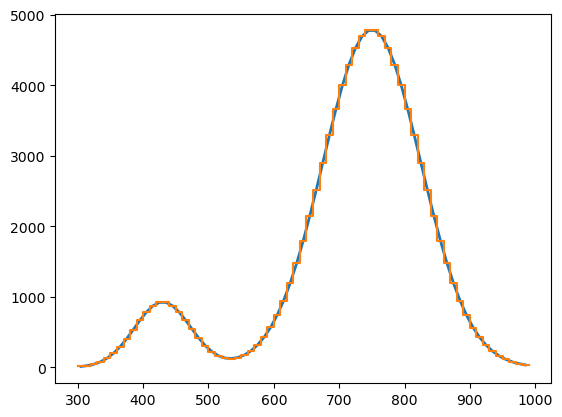

In [7]:
hl1 = histlite.Hist( bins, primary_nu_spec )
fig, ax = plt.subplots()

cents = (bins[1:] + bins[:-1]) / 2
ax.plot(cents, primary_nu_spec, lw=2)
histlite.plot1d(ax, hl1)

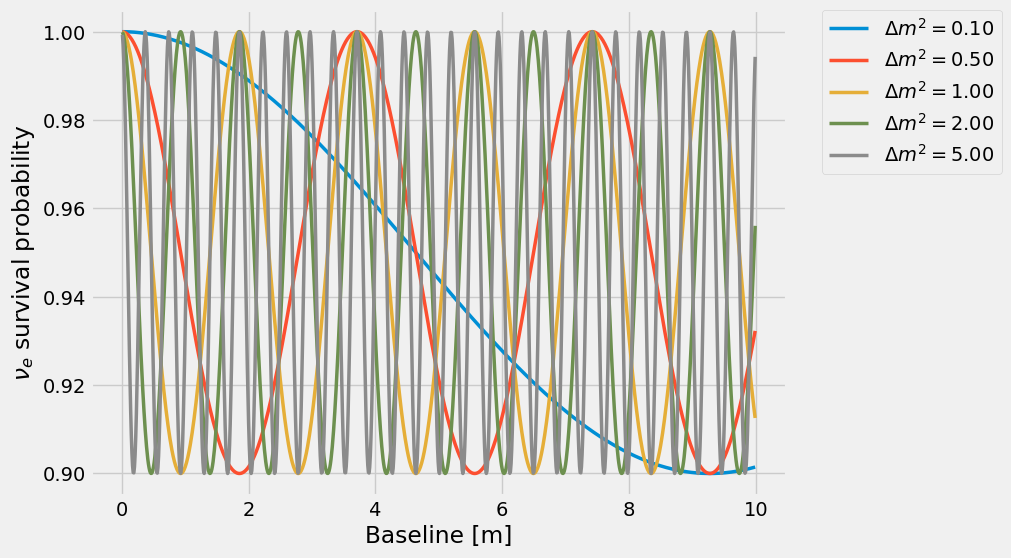

In [2]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 6))
sin2theta_square = 0.1
Enu = 0.75 # MeV
L = np.arange(0.01, 10, 0.01)
for dm2 in [0.1, 0.5, 1, 2, 5]:
    for ll in L:
        nue_survival_prob = electron_neutrino_survival_probability(dm2, sin2theta_square, Enu, L)
    ax.plot(L, nue_survival_prob, '-', lw=2.5, label=r'$\Delta m^2 = {:.2f}$'.format(dm2))
    ax.set_xlabel('Baseline [m]')
    ax.set_ylabel(r'$\nu_e$ survival probability')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Maximum oscillation probability at baseline 0.92 m with neutrino energy at [743.82654203 247.94218068 148.76530841] keV.
Maximum oscillation probability with neutrino energy at 750.0 keV at baseline [ 0.92763563  2.78290688  4.63817813  6.49344938  8.34872063 10.20399189
 12.05926314 13.91453439 15.76980564 17.6250769 ] m.


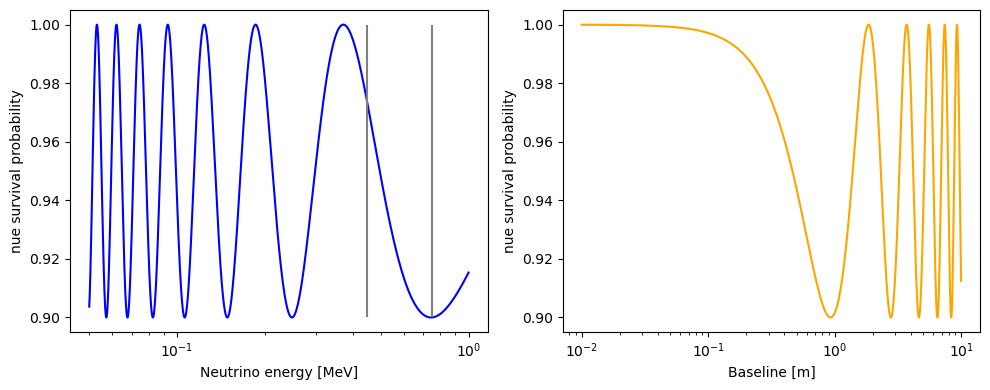

In [6]:
# check oscillation formula:
dm2 = 1 # unit: eV
sin2theta_square = 0.1
L = 0.92 # unit: m
E = np.arange(50, 1000, 0.01) / 1e3 # unit: MeV
nue_survival_prob1 = electron_neutrino_survival_probability(dm2, sin2theta_square, E, L)
L0 = np.arange(0.01, 10, 0.01)
nue_survival_prob2 = electron_neutrino_survival_probability(dm2, sin2theta_square, 0.75, L0)

E1 = maximum_oscillation_energy_with_fixed_baseline(dm2, L, np.arange(0, 3))
print(f'Maximum oscillation probability at baseline {L} m with neutrino energy at {E1*1000} keV.')

E2 = 0.75
L1 = maximum_oscillation_energy_with_fixed_energy(dm2, E2, np.arange(0, 10))
print(f'Maximum oscillation probability with neutrino energy at {E2*1000} keV at baseline {L1} m.')

#print(electron_neutrino_survival_probability(dm2, sin2theta_square, 0.75, 3.26412966))
#print(electron_neutrino_survival_probability(dm2, sin2theta_square, 0.75, 4))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(E, nue_survival_prob1, color='blue')
ax[0].set_xlabel('Neutrino energy [MeV]')
ax[0].set_ylabel('nue survival probability')
ax[0].semilogx()
ax[0].vlines(0.75, 0.90, 1.0, color='gray')
ax[0].vlines(0.45, 0.90, 1.0, color='gray')
#ax[0].vlines(E1[0], 0.90, 1.0, color='gray')
#ax[0].vlines(E1[1], 0.90, 1.0, color='gray')
#ax[0].vlines(E1[2], 0.90, 1.0, color='gray')

ax[1].plot(L0, nue_survival_prob2, color='orange')
ax[1].set_xlabel('Baseline [m]')
ax[1].set_ylabel('nue survival probability')
ax[1].semilogx()
#ax[1].vlines(L1[0], 0.90, 1.0, color='gray')
#ax[1].vlines(L1[1], 0.90, 1.0, color='gray')
#ax[1].vlines(L1[2], 0.90, 1.0, color='gray')

plt.tight_layout()

In [9]:
nL, nE = 1000, 1000
probs = np.zeros((nL, nE))
L2d, E2d = np.linspace(0.1, 2, nL), np.linspace(0.1, 1, nE)
for ii, ll in enumerate(L2d):
    for jj, ee in enumerate(E2d):
        sig.L = ll
        sig.Enu = ee
        probs[1000-ii-1, jj] = electron_neutrino_survival_probability(dm2, sin2theta_square, ee, ll)
print(electron_neutrino_survival_probability(dm2, sin2theta_square, 0.75, 0.92))

0.9000167166795289


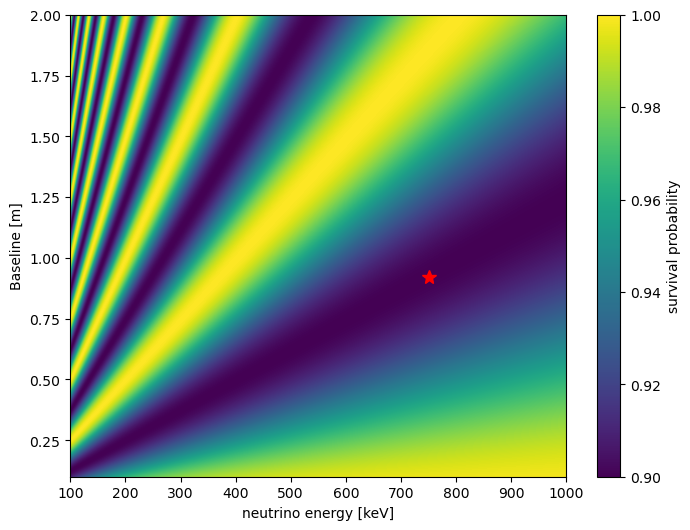

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(probs, extent=[100, 1000, 0.1, 2], aspect='auto')
ax.plot(750, 0.92, color='red', marker='*', markersize=10)
cb = plt.colorbar(im, ax=ax)
ax.set_xlabel('neutrino energy [keV]')
ax.set_ylabel('Baseline [m]')
cb.set_label('survival probability')

In [11]:
dm2 = 1 # unit: eV
sin2theta_square = 0.1
L = 0.92 # unit: m

sig._set_dm2(dm2)
sig._set_sin2theta_square(sin2theta_square)
sig._set_fixed_baseline(L)

oscillated_nu_spec = sig.oscillated_neutrino_energy_spectrum()

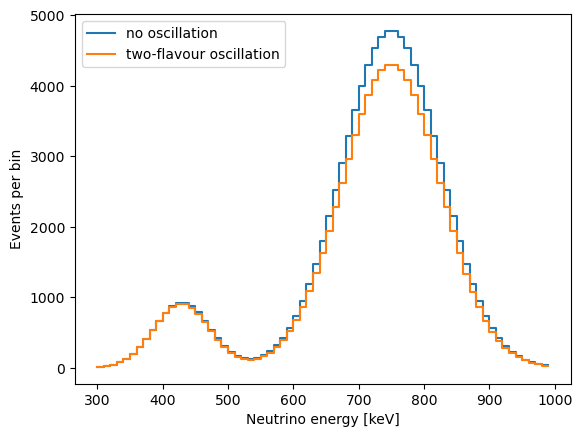

In [16]:
hl2 = histlite.Hist( bins, oscillated_nu_spec )
fig, ax = plt.subplots()
histlite.plot1d(ax, hl1, label='no oscillation')
histlite.plot1d(ax, hl2, label='two-flavour oscillation')
ax.set_xlabel('Neutrino energy [keV]')
ax.set_ylabel('Events per bin')
ax.legend()

<BarContainer object of 69 artists>

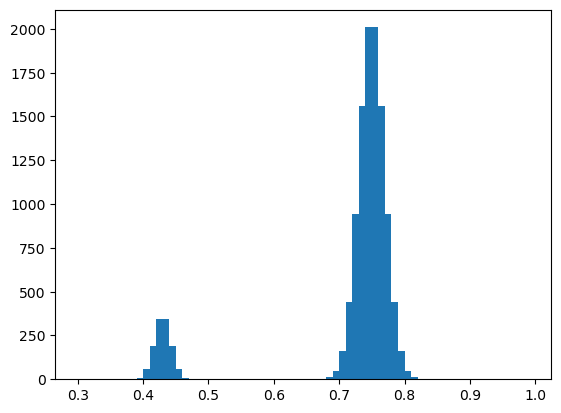

In [4]:
prob, spec, tot_spec = sig.normalized_oscillated_electron_energy_spectrum()
bincenter = (sig.energy_bins[1:]+sig.energy_bins[:-1]) / 2.
plt.bar(bincenter, sig.n_events*tot_spec, width=0.01)